# <span style="color:#756bb1">ANALISI BIVARIATA: Esercizio di Riepilogo</br></span>
(Possibile Esercizio d'Esame)

1 - Generare un dataset di 200 osservazioni con 3 variabili numeriche, 1 variabile data, 
    2 variabili factor e una variabile ordered.factor.</br>
    Per le variabili numeriche si può utilizzare la funzione rnorm, 
    per i factor si può generare un vettore di stringhe e trasformarlo in factor

2 - produrre una tabella che riporti le prinicpali statistiche descrittive 
    per ogni variabile

3 - produrre una tabella che riporti le correlazioni tra coppie 
    di variabili

4 - stimare la relazione di causalità esistente tra due variabili numeriche

5 - misurare l'associazione tra coppie di variabili factor

6 - rappresentare graficamente le relazioni tra le variabili osservate

### <span style="color:#31a354">1. Generating the Dataset</span>

In [5]:
set.seed(123)  # for reproducibility

# Numerical variables
num_var1 <- rnorm(200)
num_var2 <- rnorm(200)
num_var3 <- rnorm(200)

# Date variable
date_var <- seq(as.Date("2023-01-01"), by="days", length.out=200)

# Factor variables
factor_var1 <- factor(sample(c("Level1", "Level2", "Level3"), 200, replace=TRUE))
factor_var2 <- factor(sample(c("CategoryA", "CategoryB", "CategoryC"), 200, replace=TRUE))

# Ordered factor variable
ordered_factor_var <- factor(sample(c("Low", "Medium", "High"), 200, replace=TRUE), 
                             levels = c("Low", "Medium", "High"), ordered = TRUE)

# Combine into a data frame
dataset <- data.frame(num_var1, num_var2, num_var3, date_var, factor_var1, factor_var2, ordered_factor_var)
head(dataset)

,num_var1,num_var2,num_var3,date_var,factor_var1,factor_var2,ordered_factor_var
,<dbl>,<dbl>,<dbl>,<date>,<fct>,<fct>,<ord>
1,-0.56047565,2.1988103,-0.07355602,2023-01-01,Level1,CategoryA,Medium
2,-0.23017749,1.3124130,-1.16865142,2023-01-02,Level2,CategoryA,Low
3,1.55870831,-0.2651451,-0.63474826,2023-01-03,Level1,CategoryB,Medium
4,0.07050839,0.5431941,-0.02884155,2023-01-04,Level1,CategoryB,Low
5,0.12928774,-0.4143399,0.67069597,2023-01-05,Level1,CategoryC,Medium
6,1.71506499,-0.4762469,-1.65054654,2023-01-06,Level1,CategoryC,Low


### <span style="color:#31a354">2. Descriptive Statistics Table</span>

In [6]:
summary(dataset)
str(dataset)

    num_var1           num_var2           num_var3           date_var         
 Min.   :-2.30917   Min.   :-2.46590   Min.   :-2.80977   Min.   :2023-01-01  
 1st Qu.:-0.62576   1st Qu.:-0.59077   1st Qu.:-0.55753   1st Qu.:2023-02-19  
 Median :-0.05874   Median : 0.02283   Median : 0.07583   Median :2023-04-10  
 Mean   :-0.00857   Mean   : 0.04212   Mean   : 0.03178   Mean   :2023-04-10  
 3rd Qu.: 0.56840   3rd Qu.: 0.71482   3rd Qu.: 0.68098   3rd Qu.:2023-05-30  
 Max.   : 3.24104   Max.   : 2.57146   Max.   : 2.43023   Max.   :2023-07-19  
 factor_var1    factor_var2 ordered_factor_var
 Level1:65   CategoryA:66   Low   :74         
 Level2:61   CategoryB:69   Medium:64         
 Level3:74   CategoryC:65   High  :62         
                                              
                                              
                                              

'data.frame':	200 obs. of  7 variables:
 $ num_var1          : num  -0.5605 -0.2302 1.5587 0.0705 0.1293 ...
 $ num_var2          : num  2.199 1.312 -0.265 0.543 -0.414 ...
 $ num_var3          : num  -0.0736 -1.1687 -0.6347 -0.0288 0.6707 ...
 $ date_var          : Date, format: "2023-01-01" "2023-01-02" ...
 $ factor_var1       : Factor w/ 3 levels "Level1","Level2",..: 1 2 1 1 1 1 1 1 3 3 ...
 $ factor_var2       : Factor w/ 3 levels "CategoryA","CategoryB",..: 1 1 2 2 3 3 2 1 1 3 ...
 $ ordered_factor_var: Ord.factor w/ 3 levels "Low"<"Medium"<..: 2 1 2 1 2 1 3 2 1 1 ...


### <span style="color:#31a354">3. Correlation Table</span>

In [7]:
correlations <- cor(dataset[, sapply(dataset, is.numeric)], method = "pearson")
correlations

correlations <- cor(dataset[, sapply(dataset, is.numeric)], method = "spearman")
correlations

,num_var1,num_var2,num_var3
num_var1,1.00000000,-0.02770462,-0.03023254
num_var2,-0.02770462,1.00000000,-0.05141456
num_var3,-0.03023254,-0.05141456,1.00000000


,num_var1,num_var2,num_var3
num_var1,1.00000000,-0.04586065,-0.01850896
num_var2,-0.04586065,1.00000000,-0.03703893
num_var3,-0.01850896,-0.03703893,1.00000000


### <span style="color:#31a354">4. Estimating Causality Between Two Numerical Variables</span>

#### <span style="color:#3182bd">Simple Regression</span>


Call:
lm(formula = num_var1 ~ num_var2, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2764 -0.6292 -0.0538  0.5846  3.2754 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.007465   0.066894  -0.112    0.911
num_var2    -0.026237   0.067276  -0.390    0.697

Residual standard error: 0.9452 on 198 degrees of freedom
Multiple R-squared:  0.0007675,	Adjusted R-squared:  -0.004279 
F-statistic: 0.1521 on 1 and 198 DF,  p-value: 0.697


[1] -0.007465317 -0.026236909

Caricamento del pacchetto richiesto: quantreg

Caricamento del pacchetto richiesto: SparseM


Caricamento pacchetto: 'SparseM'


Il seguente oggetto `e mascherato da 'package:base':

    backsolve




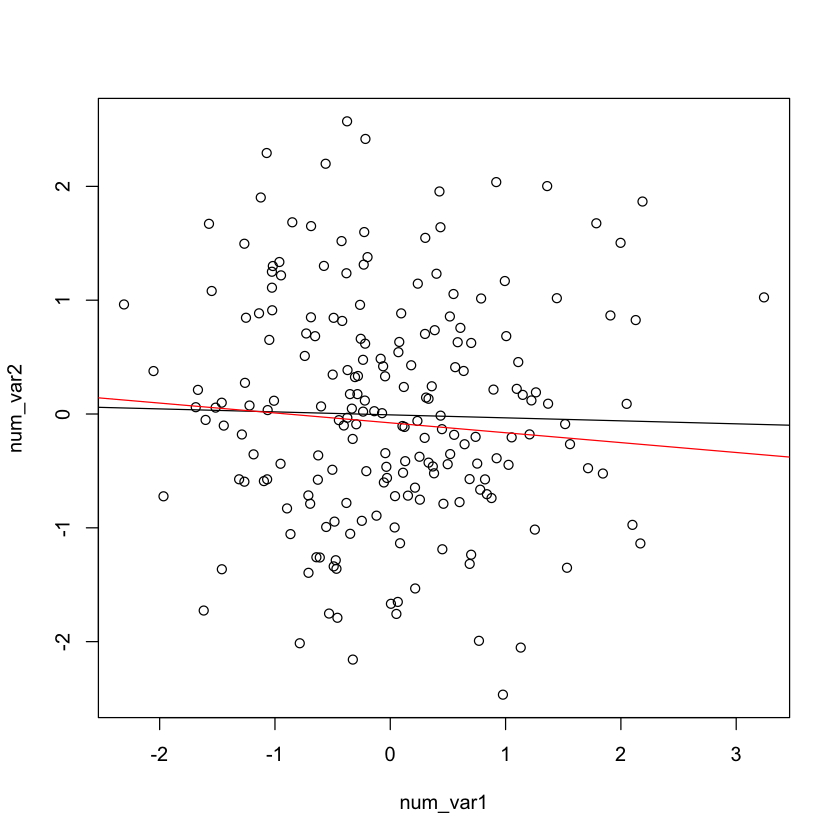

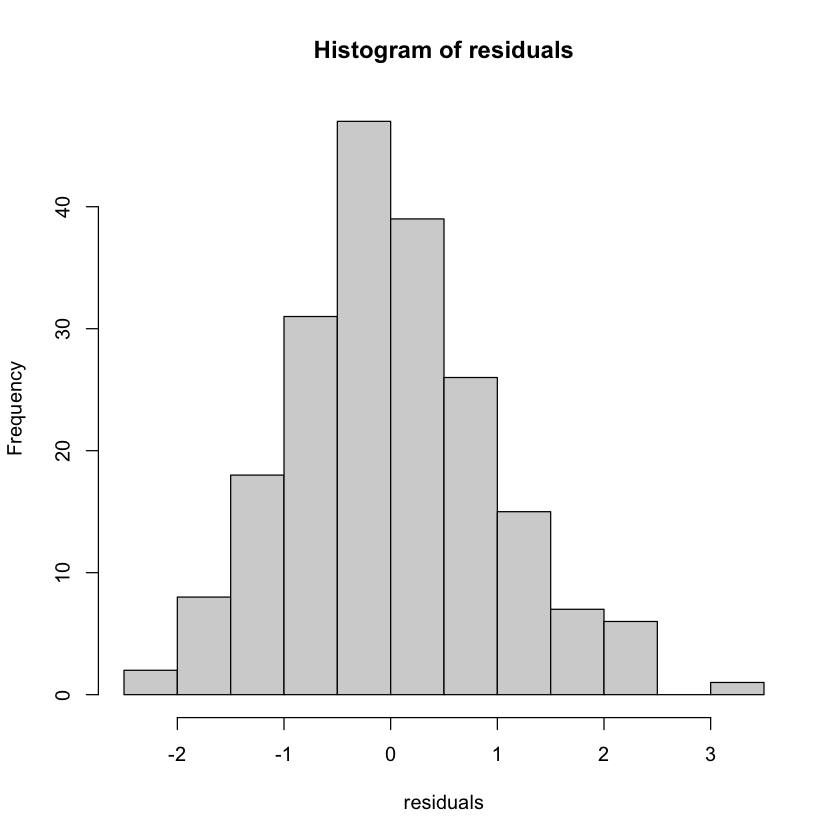

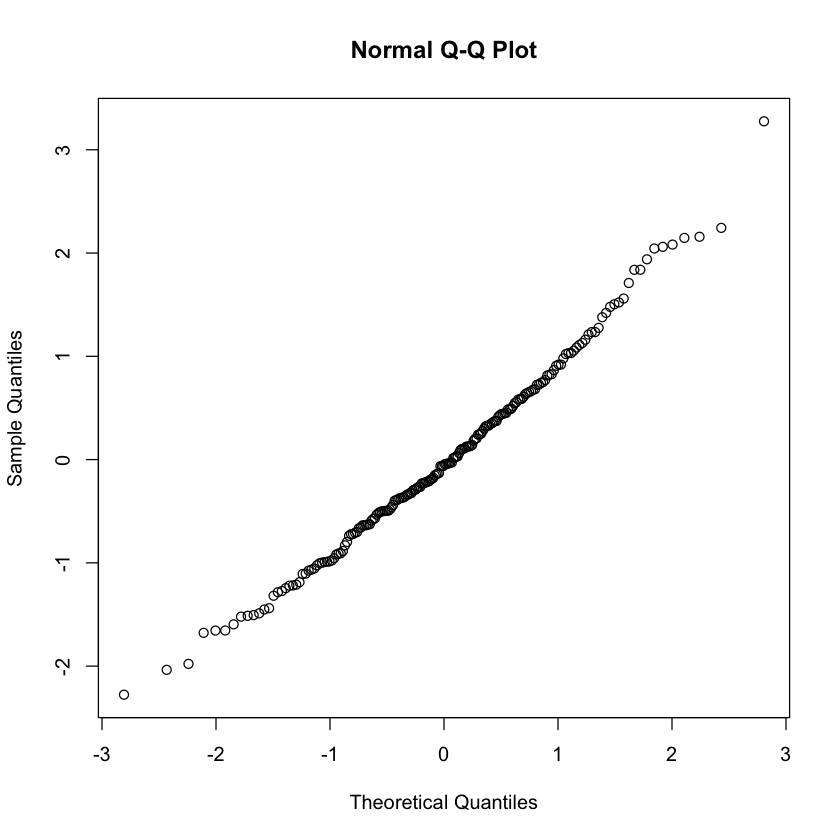

In [8]:
causality_model <- lm(num_var1 ~ num_var2, data = dataset)
summary(causality_model)

residuals <- residuals(causality_model)
par(bg = "white")
plot(num_var1, num_var2)
as.numeric(lm(num_var1 ~ num_var2)$coefficients)
abline(a=as.numeric(lm(num_var1 ~ num_var2)$coefficients)[1],
       b=as.numeric(lm(num_var1 ~ num_var2)$coefficients)[2])

require(quantreg)
formula <- num_var1 ~ num_var2
residuals_quantile <- rq(formula, tau = 0.5)
abline(residuals_quantile, col = "red")


hist(residuals)

qqnorm(residuals)


Call:
lm(formula = num_var1 ~ num_var3, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3099 -0.6292 -0.0457  0.5863  3.2925 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.007631   0.066866  -0.114    0.909
num_var3    -0.029554   0.069441  -0.426    0.671

Residual standard error: 0.9451 on 198 degrees of freedom
Multiple R-squared:  0.000914,	Adjusted R-squared:  -0.004132 
F-statistic: 0.1811 on 1 and 198 DF,  p-value: 0.6709


[1] -0.007631343 -0.029554278

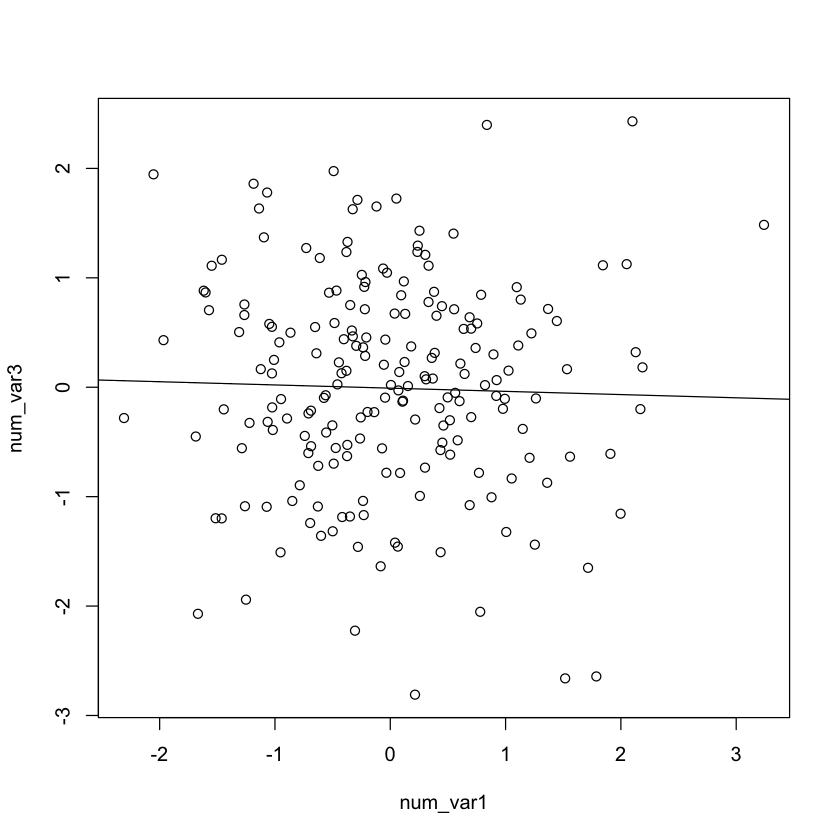

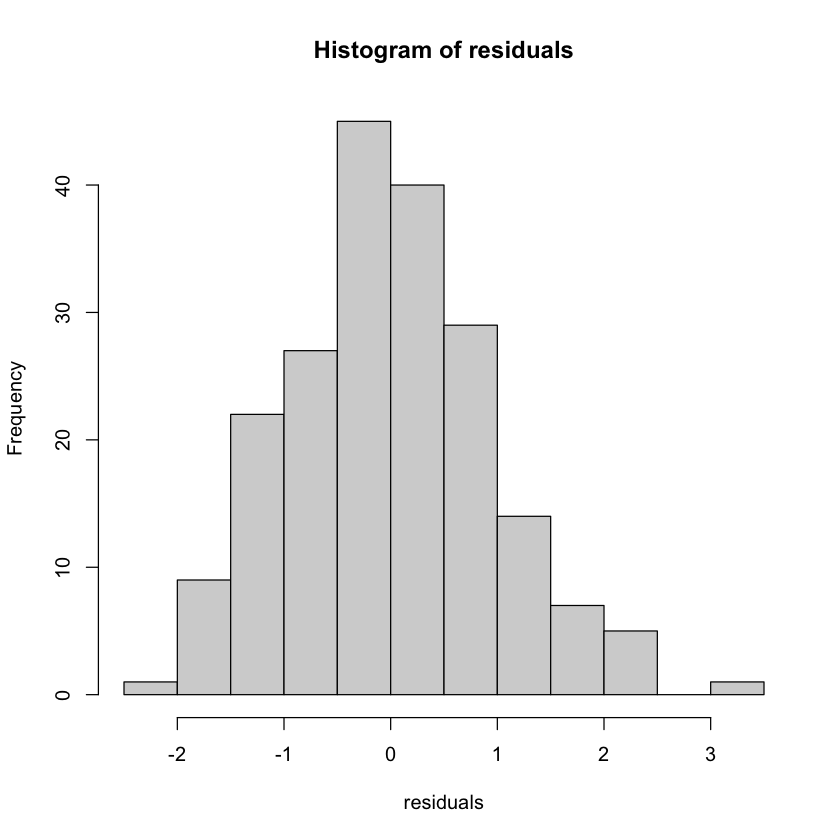

In [9]:
causality_model <- lm(num_var1 ~ num_var3, data = dataset)
summary(causality_model)

residuals <- residuals(causality_model)
par(bg = "white")
plot(num_var1, num_var3)
as.numeric(lm(num_var1 ~ num_var3)$coefficients)
abline(a=as.numeric(lm(num_var1 ~ num_var3)$coefficients)[1],
       b=as.numeric(lm(num_var1 ~ num_var3)$coefficients)[2])

hist(residuals)


Call:
lm(formula = num_var2 ~ num_var3, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.52018 -0.61817 -0.04409  0.70150  2.49424 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.04381    0.07054   0.621    0.535
num_var3    -0.05307    0.07326  -0.724    0.470

Residual standard error: 0.9971 on 198 degrees of freedom
Multiple R-squared:  0.002643,	Adjusted R-squared:  -0.002394 
F-statistic: 0.5248 on 1 and 198 DF,  p-value: 0.4697


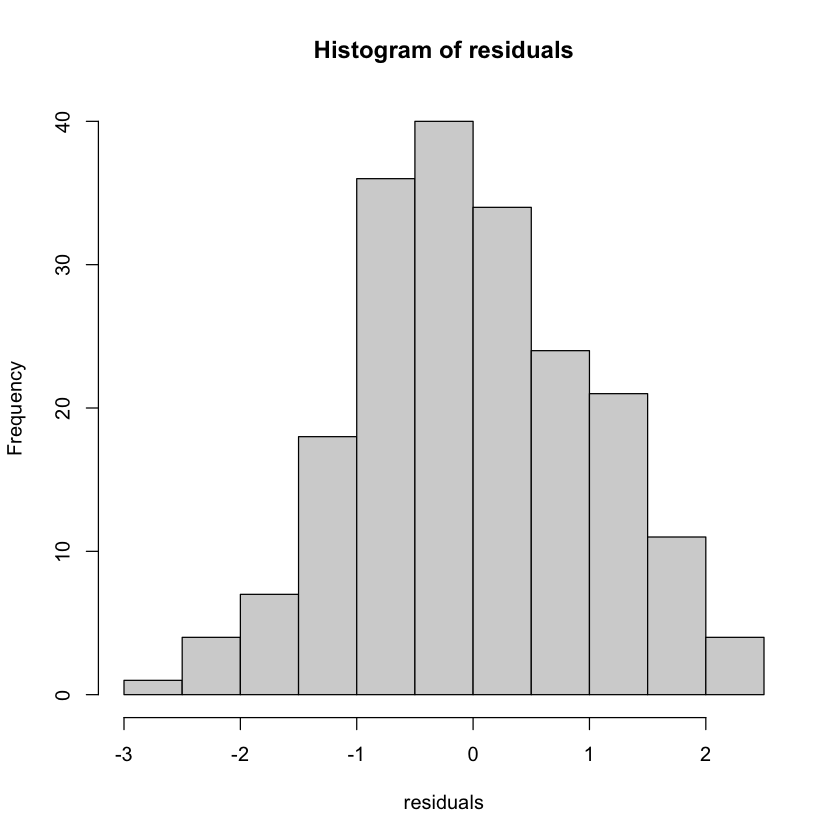

In [10]:
causality_model <- lm(num_var2 ~ num_var3, data = dataset)
summary(causality_model)

residuals <- residuals(causality_model)
par(bg = "white")
hist(residuals)

### <span style="color:#31a354">5. Measuring Association Between Factor Variables</span>

#### <span style="color:#3182bd">Kendall</span>

In [11]:
cor(as.numeric(dataset$factor_var1), as.numeric(dataset$factor_var2), method = "kendall")
# The two variable are not correlated

cor(as.numeric(dataset$factor_var1), as.numeric(dataset$ordered_factor_var), method = "kendall")
# The two variable are not correlated

cor(as.numeric(dataset$factor_var2), as.numeric(dataset$ordered_factor_var), method = "kendall")
# The two variable are not correlated

[1] 0.09655131

[1] 0.001504834

[1] 0.0211863

#### <span style="color:#3182bd">Chi-Quadro</span>

In [12]:
assoc_test1 <- chisq.test(dataset$factor_var1, dataset$factor_var2)
assoc_test1

assoc_test2 <- chisq.test(dataset$factor_var1, dataset$ordered_factor_var)
assoc_test2

assoc_test3 <- chisq.test(dataset$factor_var2, dataset$ordered_factor_var)
assoc_test3


	Pearson's Chi-squared test

data:  dataset$factor_var1 and dataset$factor_var2
X-squared = 5.9539, df = 4, p-value = 0.2026



	Pearson's Chi-squared test

data:  dataset$factor_var1 and dataset$ordered_factor_var
X-squared = 2.4579, df = 4, p-value = 0.6522



	Pearson's Chi-squared test

data:  dataset$factor_var2 and dataset$ordered_factor_var
X-squared = 3.2452, df = 4, p-value = 0.5177


#### <span style="color:#3182bd">Devianza</span>

In [13]:
tbl <- xtabs(~factor_var1 + factor_var2, data = dataset)
tbl

frequenze_osservate <- tbl
frequenze_attese <- chisq.test(tbl)$expected

sum((frequenze_osservate - frequenze_attese)^2 / frequenze_attese)

           factor_var2
factor_var1 CategoryA CategoryB CategoryC
     Level1        28        20        17
     Level2        18        19        24
     Level3        20        30        24

[1] 5.953912

### <span style="color:#31a354">6. Graphical Representation of Relationships</span>

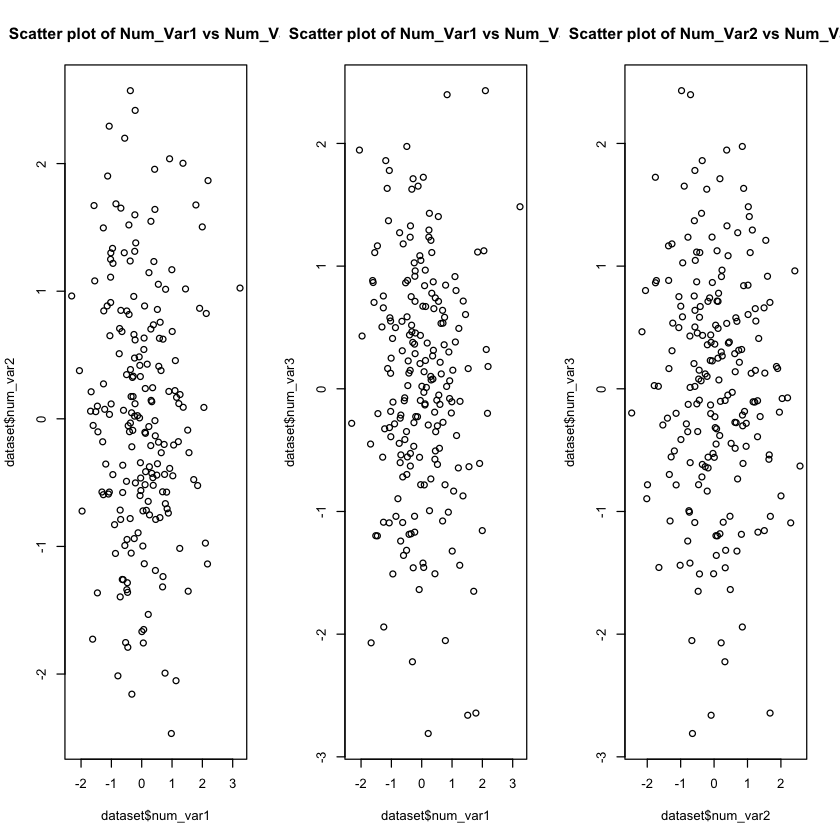

In [14]:
# Scatter plot for numerical variables
par(bg="white")
par(mfrow=c(1,3))
plot(dataset$num_var1, dataset$num_var2, main="Scatter plot of Num_Var1 vs Num_Var2")
plot(dataset$num_var1, dataset$num_var3, main="Scatter plot of Num_Var1 vs Num_Var3")
plot(dataset$num_var2, dataset$num_var3, main="Scatter plot of Num_Var2 vs Num_Var3")

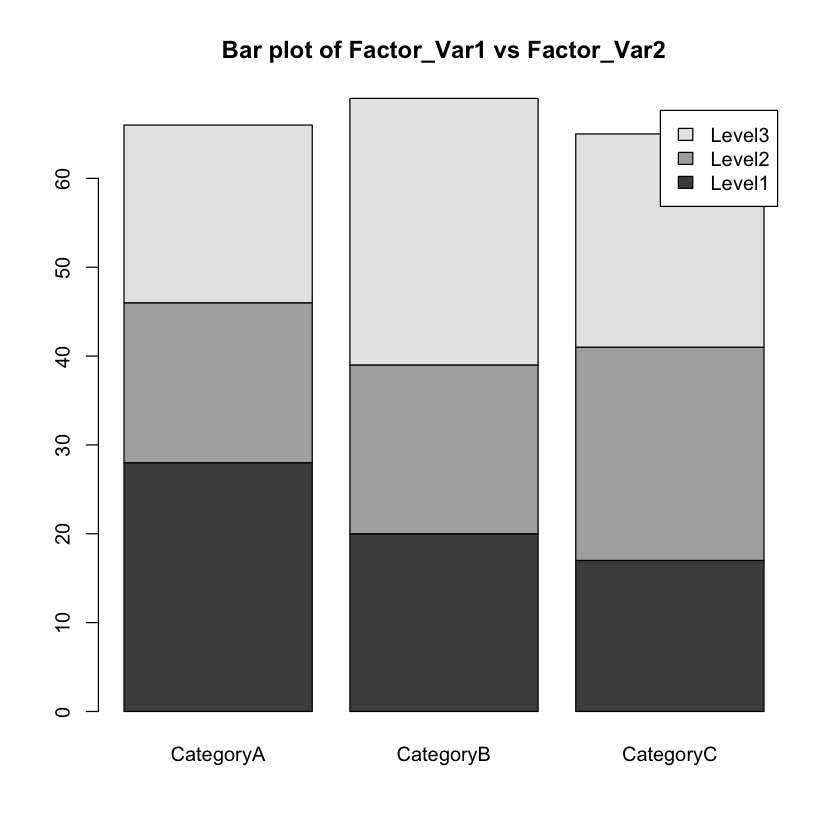

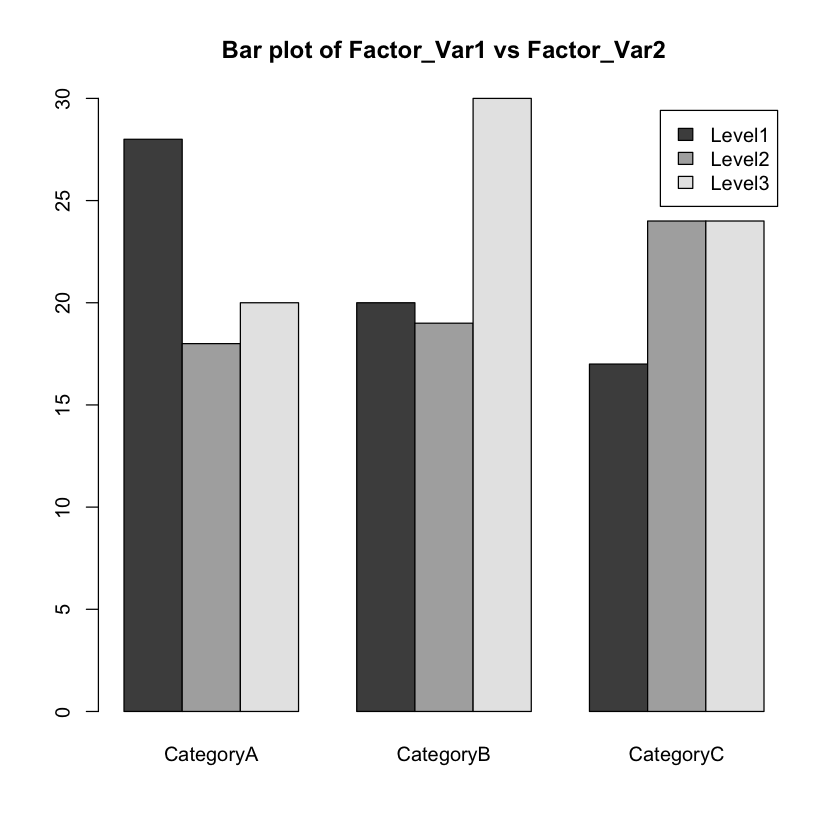

In [15]:
ftable_ <- ftable(table(dataset$factor_var1, dataset$factor_var2), dataset$ordered_factor_var)
par(mfrow=c(1,1))
par(bg="white")
# Bar plot for factor variables
barplot(table(dataset$factor_var1, dataset$factor_var2), legend = TRUE, 
        main = "Bar plot of Factor_Var1 vs Factor_Var2")

barplot(table(dataset$factor_var1, dataset$factor_var2), legend = TRUE, 
        main = "Bar plot of Factor_Var1 vs Factor_Var2",
        beside = TRUE)

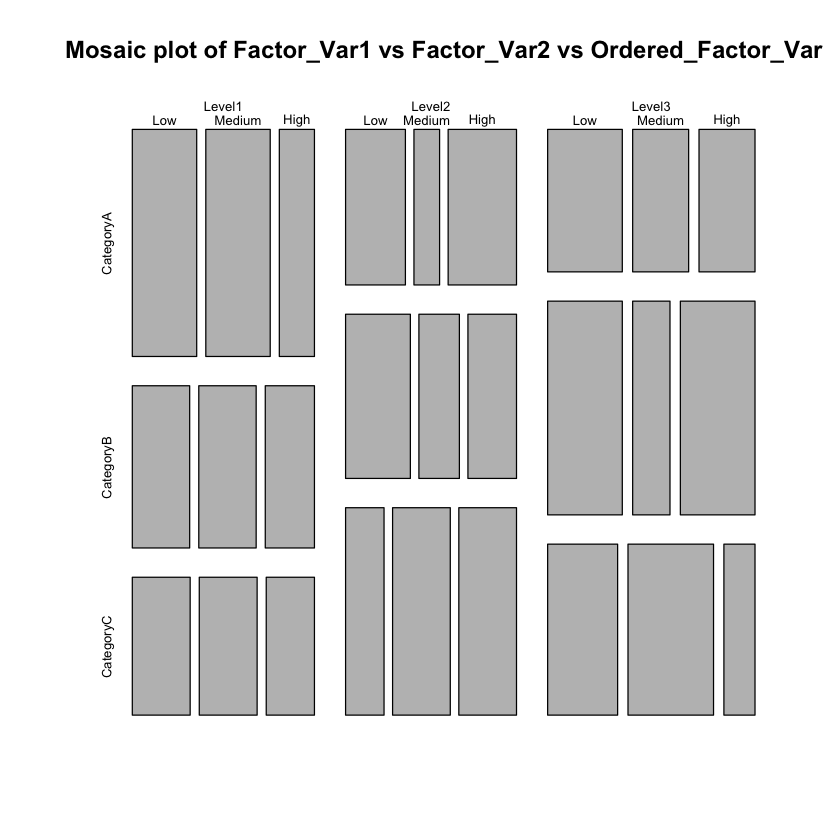

In [16]:
par(bg="white")
mosaicplot(table(dataset$factor_var1, dataset$factor_var2, dataset$ordered_factor_var), main = "Mosaic plot of Factor_Var1 vs Factor_Var2 vs Ordered_Factor_Var")